In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
df = pd.read_csv(r'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
id                     28332 non-null object
dateAdded              28332 non-null object
dateUpdated            28332 non-null object
name                   28332 non-null object
asins                  28332 non-null object
brand                  28332 non-null object
categories             28332 non-null object
primaryCategories      28332 non-null object
imageURLs              28332 non-null object
keys                   28332 non-null object
manufacturer           28332 non-null object
manufacturerNumber     28332 non-null object
reviews.date           28332 non-null object
reviews.dateSeen       28332 non-null object
reviews.didPurchase    9 non-null object
reviews.doRecommend    16086 non-null object
reviews.id             41 non-null float64
reviews.numHelpful     16115 non-null float64
reviews.rating         28332 non-null int64
reviews.sourceURLs     28332 non-null obje

In [8]:
df["asins"].unique()   #unique products

array(['B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B01J24C0TI', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B00QFQRELG', 'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4',
       'B00Y3QOH5G', 'B01BH83OOM', 'B00ZV9PXP2', 'B00NH144GK,B00LA9H1E8',
       'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y', 'B0751RGYJV',
       'B00IOY8XWQ', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01AHB9CYG', 'B01ACEKAJY',
       'B00REQKWGA', 'B00IOYAM4I', 'B01IO618J8', 'B018Y22BI4',
       'B01AHBBG04', 'B01AHBDCKQ', 'B00VINDBJK',
       'B0189XZRTI,B0189XYY0Q,B0189XZ0KY', 'B01J94SWWU', 'B00QAVO43C',
       'B06VTJWRJW', 'B00QAVNWSK', 'B01J94SCAM', 'B01J94SBEY',
       'B01J94YIT6', 'B01J94T1Z2', 'B018Y224PY'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027019BC3BA8>,
      dtype=object)

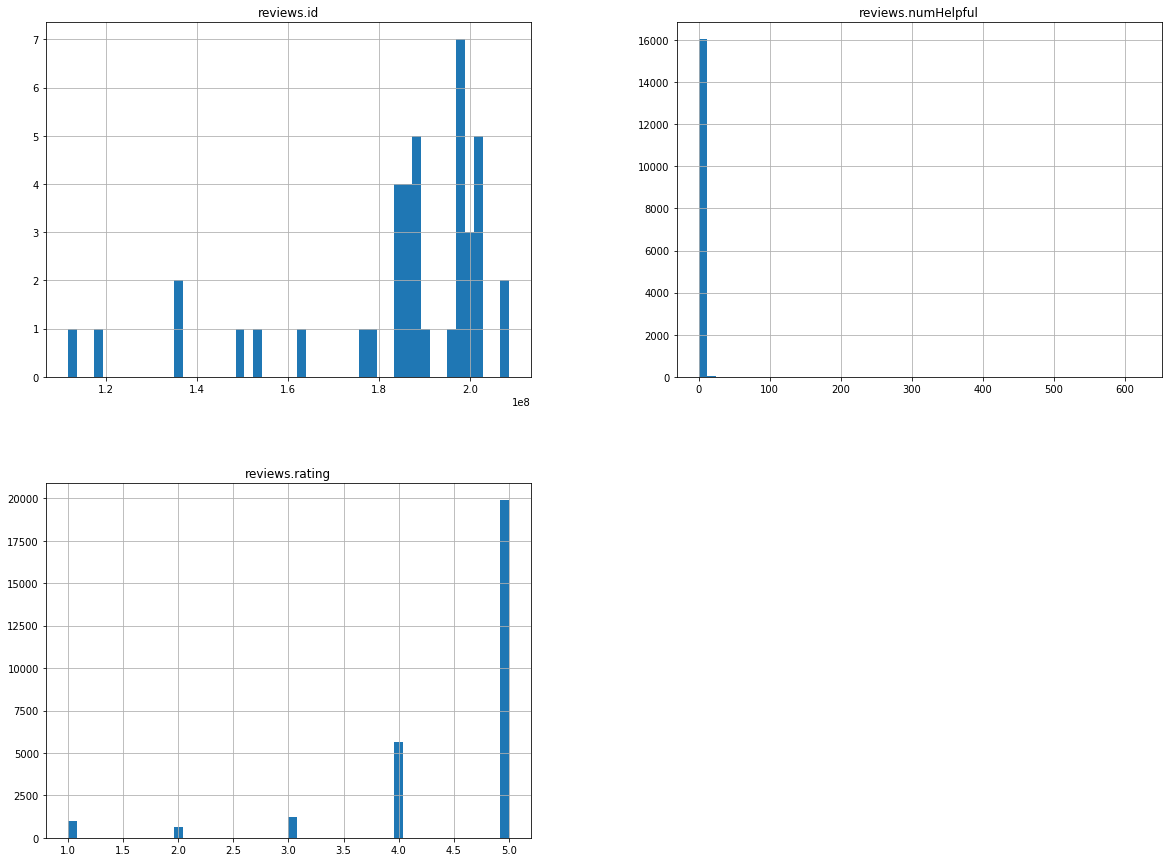

In [9]:
df.hist(bins=50, figsize=(20,15))

In [10]:
print("Before {}".format(len(df)))
dataAfter = df.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 28332
After 28332


In [54]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

stop_words = set(stopwords.words('english'))

# to lowercase
df['review.text'] = df['reviews.text'].str.lower()

# Lemmatization
df['review.text'] = df['review.text'].apply(lemmatize_text)

# Remove stop words
df['review.text'] = df['review.text'].apply(lambda x: [item for item in x if item not in stop_words])

# Rejoing the words into a sentence
df['review.text'] = df['review.text'].str.join(' ')



0        order 3 one item bad quality. missing backup s...
1             bulk always le expensive way go product like
2                               well duracell price happy.
3        seem work well name brand battery much better ...
4                        battery long lasting price great.
5        bought lot battery christmas amazonbasics cell...
6               ive problame battery ordered past pleased.
7        well looking cheap non-rechargeable battery la...
8        hold amount high power juice like energizer du...
9        amazonbasics aa aaa battery done well appear g...
10       find amazon basic battery equal superior name ...
11       first started getting amazon basic battery rea...
12       use fish tank's light night work great, love e...
13       got em can't really comment good job, good pri...
14                        many thing need aa battery great
15       thankful wa able find amazon great price even ...
16       know would buy thus brand seems like last long.

In [36]:
df["reviews.rating"].value_counts()/len(df)   #percentage of ratings

5    0.702280
4    0.199351
3    0.042567
1    0.034060
2    0.021742
Name: reviews.rating, dtype: float64

In [37]:
reviews = df.copy()

In [38]:
reviews.groupby("asins")["name"].unique()

asins
B0002LCUZK,B010CEC6MI,B01B25NN64    [Expanding Accordion File Folder Plastic Porta...
B001NIZB5M                          [Amazon Kindle Replacement Power Adapter (Fits...
B005OOKNP4                          [AmazonBasics Bluetooth Keyboard for Android D...
B006BGZJJ4                          [Amazon Kindle Charger Power Adapter Wall Char...
B006GWO7UA                          [Kindle PowerFast International Charging Kit (...
B006LW0W5Y                            [AmazonBasics 16-Gauge Speaker Wire - 100 Feet]
B00BGIQS1A                          [Oem Amazon Kindle Power Usb Adapter Wall Trav...
B00DIHVMEA,B00EZ1ZTV0               [AmazonBasics Nylon CD/DVD Binder (400 Capacity)]
B00DUGZFWY                             [AmazonBasics 15.6-Inch Laptop and Tablet Bag]
B00EEBS9O0,B01CHQHIJK               [AmazonBasics Backpack for Laptops up to 17-in...
B00F5CKWBA,B00KPQCWAU                         [AmazonBasics External Hard Drive Case]
B00IOY8XWQ                          [Kindle Voya

In [39]:
%matplotlib inline 

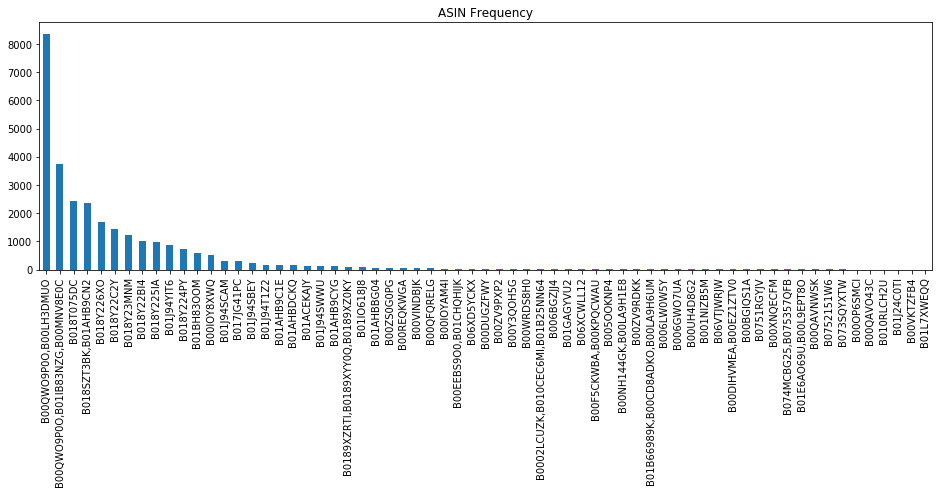

In [41]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
#ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")

In [17]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating
reviews.id,1.000000,-0.553529,0.074941
reviews.numHelpful,-0.553529,1.000000,-0.041006
reviews.rating,0.074941,-0.041006,1.000000


In [18]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
"B00QWO9P0O,B00LH3DMUO",8343
"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",3728
B018T075DC,2443
"B018SZT3BK,B01AHB9CN2",2370
B018Y226XO,1676


In [19]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
"B0002LCUZK,B010CEC6MI,B01B25NN64",5.000000
B001NIZB5M,2.800000
B005OOKNP4,4.333333
B006BGZJJ4,4.666667
B006GWO7UA,4.800000


In [20]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
"B00QWO9P0O,B00LH3DMUO",8343,4.448040
"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",3728,4.453594
B018T075DC,2443,4.597217
"B018SZT3BK,B01AHB9CN2",2370,4.584388
B018Y226XO,1676,4.531026
B018Y22C2Y,1425,4.534035
B018Y23MNM,1212,4.534653
B018Y22BI4,1024,4.506836
B018Y225IA,987,4.511651
B01J94YIT6,883,4.578709


,asins,reviews.rating
asins,1.000000,0.021024
reviews.rating,0.021024,1.000000


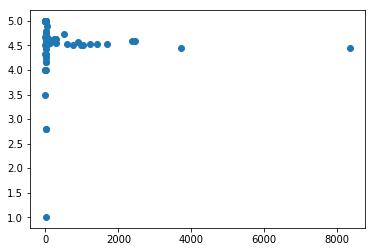

In [21]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()
